## Part 1

In [1]:
import pandas as pd

In [13]:
# loading the data
AIG = pd.read_csv("AIG.csv")
BWA = pd.read_csv("BWA.csv")
DLR = pd.read_csv("DLR.csv")
ODFL = pd.read_csv("ODFL.csv")
SLB = pd.read_csv("SLB.csv")

In [14]:
# converting to datetime
AIG["Date"] = pd.to_datetime(AIG["Date"])
BWA["Date"] = pd.to_datetime(BWA["Date"])
DLR["Date"] = pd.to_datetime(DLR["Date"])
ODFL["Date"] = pd.to_datetime(ODFL["Date"])
SLB["Date"] = pd.to_datetime(SLB["Date"])

In [15]:
# merging the data
df = pd.concat(
    {
    "AIG":AIG.set_index("Date"),
    "BWA":BWA.set_index("Date"),
    "DLR":DLR.set_index("Date"),
    "ODFL":ODFL.set_index("Date"),
    "SLB":SLB.set_index("Date")
    }, axis = 1
    )

In [16]:
df.head()

AIG                                                          \
              Open    High     Low   Close   Volume Dividends Stock Splits   
Date                                                                         
2021-01-04  33.769  34.038  33.024  33.303  7081000       0.0          0.0   
2021-01-05  33.437  34.092  33.347  33.859  4268000       0.0          0.0   
2021-01-06  34.639  36.469  34.639  36.065  8198600       0.0          0.0   
2021-01-07  36.576  36.809  36.191  36.675  5109700       0.0          0.0   
2021-01-08  36.774  36.881  35.886  36.433  5344800       0.0          0.0   

               BWA                  ...     ODFL                         \
              Open    High     Low  ...   Volume Dividends Stock Splits   
Date                                ...                                   
2021-01-04  32.040  32.163  31.029  ...  2079600       0.0          0.0   
2021-01-05  31.120  32.237  31.120  ...  2725000       0.0          0.0   
2021-01-06  32.048  33.215  32.048  ...  2098200       0.0          0.0   
2021-01-07  33.519  34.004  33.191  ...  2042000       0.0          0.0   
2021-01-08  33.675  33.807  32.755  ...  1281800       0.0          0.0   

               SLB                                                           
              Open    High     Low   Close    Volume Dividends Stock Splits  
Date                                                                         
2021-01-04  19.991  20.262  19.547  19.873   8743400       0.0          0.0  
2021-01-05  20.117  21.557  20.108  20.941  16256600       0.0          0.0  
2021-01-06  21.693  22.662  21.467  22.100  19456300       0.0          0.0  
2021-01-07  22.218  23.060  22.155  22.526  14502400       0.0          0.0  
2021-01-08  22.634  22.969  22.164  22.490  11951900       0.0          0.0  

[5 rows x 35 columns]

In [19]:
# finding company that has equal high and low
[c for c in df.columns.levels[0]
 if (df[c]["High"] == df[c]["Low"]).any()]

[]

No company has no difference between the High and Low columns for any trading day

In [20]:
# highest and lowest price each company recorded
for c in df.columns.levels[0]:
    print(f"The lowest price recorded for company {c} is: {df[c]["Low"].min()} and the highest price is: {df[c]["High"].max()}")

The lowest price recorded for company AIG is: 33.007 and the highest price is: 78.258
The lowest price recorded for company BWA is: 26.306 and the highest price is: 45.973
The lowest price recorded for company DLR is: 77.127 and the highest price is: 192.354
The lowest price recorded for company ODFL is: 92.675 and the highest price is: 231.777
The lowest price recorded for company SLB is: 19.221 and the highest price is: 58.914


In [27]:
# log returns from Close
close_log_returns = df.xs("Close", level=1, axis=1)

# min, max, mean, standard deviation, and skewness of returns
for c in df.columns.levels[0]:
    print(f"Returns of company {c}: min = {close_log_returns[c].min()}, max = {close_log_returns[c].max()}, mean = {close_log_returns[c].mean()}, std = {close_log_returns[c].std()}, skewness = {close_log_returns[c].skew()}")
        

Returns of company AIG: min = 33.303, max = 77.977, mean = 56.77387649402392, std = 10.72763981371331, skewness = 0.29799371547970555
Returns of company BWA: min = 26.526, max = 45.56, mean = 35.69725597609562, std = 3.984230599601603, skewness = 0.22546739917734376
Returns of company DLR: min = 79.564, max = 190.11, mean = 124.27350796812749, std = 21.75247123781757, skewness = 0.3023933382479654
Returns of company ODFL: min = 93.282, max = 230.366, mean = 162.53862450199202, std = 32.535981395147765, skewness = 0.02079603217487598
Returns of company SLB: min = 19.746, max = 58.895, mean = 40.0701374501992, std = 9.749202432037677, skewness = -0.18884287045856535


In [33]:
close_log_returns.head()

,AIG,BWA,DLR,ODFL,SLB
Date,,,,,
2021-01-04,33.303,31.276,114.700,93.282,19.873
2021-01-05,33.859,32.016,112.724,93.800,20.941
2021-01-06,36.065,33.010,112.004,94.558,22.100
2021-01-07,36.675,33.774,113.275,98.795,22.526
2021-01-08,36.433,33.108,113.267,100.556,22.490


In [44]:
# date of second highest loss and second highest gain
for i in close_log_returns.columns:
    print(f"The highest gain of company {i} was on {close_log_returns[i].sort_values(ascending = True).index[-2]} and the highest loss on {close_log_returns[i].sort_values(ascending = False).index[-2]}")

The highest gain of company AIG was on 2024-05-07 00:00:00 and the highest loss on 2021-02-01 00:00:00
The highest gain of company BWA was on 2023-07-31 00:00:00 and the highest loss on 2022-09-29 00:00:00
The highest gain of company DLR was on 2024-11-27 00:00:00 and the highest loss on 2022-10-12 00:00:00
The highest gain of company ODFL was on 2024-11-06 00:00:00 and the highest loss on 2021-01-05 00:00:00
The highest gain of company SLB was on 2023-09-14 00:00:00 and the highest loss on 2021-01-04 00:00:00


In [47]:
# Median calsendar weekly volume
# select the Volume column for every company
vol = df.xs("Volume", level=1, axis=1)
vol = vol.sort_index() 
weekly_sum = vol.resample('W').sum()
median_weekly_volume = weekly_sum.median()
median_weekly_volume

AIG     20178900.0
BWA     10766214.0
DLR      8073200.0
ODFL     6866200.0
SLB     52774100.0
dtype: float64

In [50]:
# Which company recorded the lowest total return over the whole period?
# total returns for each company
total_returns = close_log_returns.iloc[-1] / close_log_returns.iloc[0]
# company with the lowest total return
total_returns.idxmin()

'BWA'

In [ ]:
# Create a new column volume_class with categories (e.g., “Low”, “Medium”, “High”) based on volume tertiles
df["volume_class"] = 

<function matplotlib.pyplot.show(close=None, block=None)>

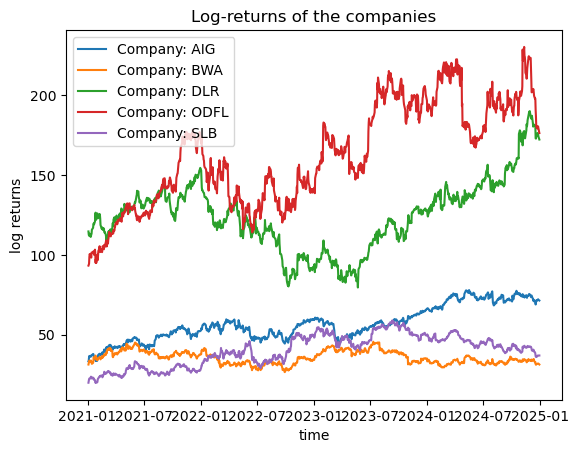

In [55]:
# Plot the log-returns of the companies (ideally in the same plot).
import matplotlib.pyplot as plt
plt.plot("Date","AIG", data = close_log_returns.reset_index())
plt.plot("Date","BWA", data = close_log_returns.reset_index())
plt.plot("Date","DLR", data = close_log_returns.reset_index())
plt.plot("Date","ODFL", data = close_log_returns.reset_index())
plt.plot("Date","SLB", data = close_log_returns.reset_index())
plt.xlabel("time")
plt.ylabel("log returns")
plt.title("Log-returns of the companies")
plt.legend([f"Company: {i}" for i in close_log_returns.columns])
plt.show

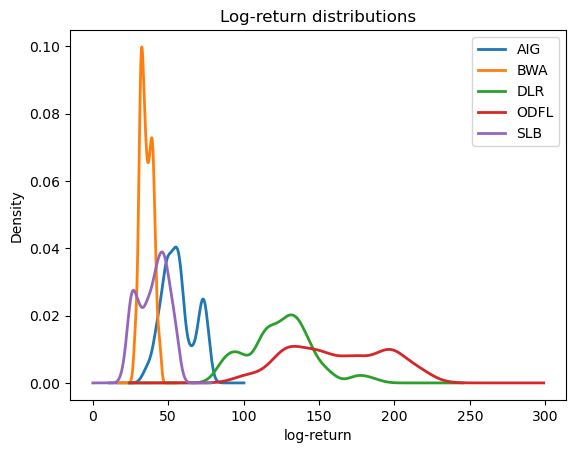

In [54]:
# Plot the distribution of log-returns (ideally in the same plot)
for c in close_log_returns.columns:
    close_log_returns[c].plot(kind="kde", label=c, linewidth=2)
plt.xlabel("log-return")
plt.title("Log-return distributions")
plt.legend()
plt.show()

## Part 2

In [59]:
# importing the data
data = pd.read_csv("companies_no_subindustry.csv")
data.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [60]:
# How many companies have missing inclusion dates (“included” column)?
int(data["included"].isna().sum())

45

In [61]:
# Remove companies with missing inclusion dates. Find the oldest and youngest
 # constituent, and compute the median age of a constituent.
#  Hint: pd.to_datetime(..., dayfirst=True, errors=’coerce’).
data_cleaned = data.drop(index = data.index[data["included"].isna()])
data_cleaned.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [64]:
# checking if the na values were dropped
data.shape, data_cleaned.shape

((503, 6), (458, 6))

In [66]:
# Compute the number of companies in each of the sectors and visualize pro portions (e.g., pie chart).
sectors = data["GICS_Sector"].value_counts()
sectors

GICS_Sector
Information Technology    75
Industrials               71
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    25
Energy                    23
Name: count, dtype: int64

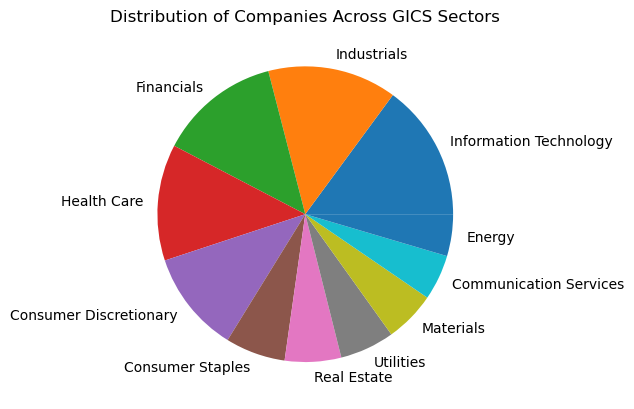

In [67]:
# plotting
plt.pie(sectors, labels=sectors.index)
plt.title("Distribution of Companies Across GICS Sectors")
plt.show()

In [ ]:
# Parse the hq column to extract the state and describe its distribution (e.g., bar plot).